**Tarea 5 laboratorio**

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.stats as stats

**6.2**

In [194]:
#6.2
F = np.linspace(10,110,11)
V = np.array([16,45,64,75,70,115,142,167,183,160,221])
y_error = np.array([5, 5, 5, 5, 30, 5, 5, 5, 5, 30, 5])
weight = []

for i in range(0, len(V)):
    weight.append(1/(y_error[i]**2))

sumx = 0
sumy = 0
sumxy = 0
sumxx = 0
sumw = 0

for i in range(0, len(F)):
    sumw += weight[i]
    sumx += weight[i]*F[i]
    sumy += weight[i]*V[i]
    sumxy += weight[i]*F[i]*V[i]
    sumxx += weight[i]*(F[i]**2)

delta_ = sumw*sumxx - (sumx**2)
c = (sumxx*sumy - sumx*sumxy)/delta_
m = (sumw*sumxy - sumx*sumy)/delta_
ac = np.sqrt(sumxx/delta_)
am = np.sqrt(sumw/delta_)

x = np.linspace(min(F), max(F), len(F))
y = m*x + c

print('El valor del punto de corte es {} con incertidumbre de {}'.format(np.round(c,2),np.round(ac,2)))
print('El valor de la pendiente es {} con incertidumbre de {}'.format(np.round(m,2),np.round(am,2)))
print('El peso es {}'.format(round(delta_,2)))

El valor del punto de corte es -0.95 con incertidumbre de 3.39
El valor de la pendiente es 2.03 con incertidumbre de 0.05
El peso es 134.07


El valor para D fue de 2.0, por lo que se dice que los residuales están distribuidos aleatoriamente en una gaussiana


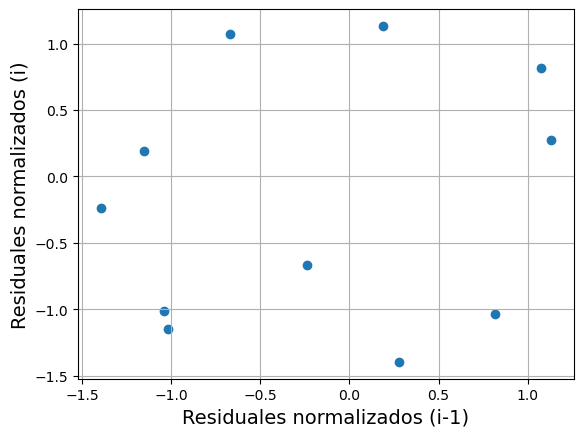

In [195]:
def Residualsi(y,ym):
    e = []
    for i in range(0,len(y)):
        e.append((y[i]-ym[i])/y_error[i])
    return e

def Residualsi1(y,ym):
    e = []
    for i in range(0,len(y)):
        e.append((y[i-1]-ym[i-1])/y_error[i-1])
    return e

sum1 = 0
sum2 = 0
for i in range(0,len(y)):
   sum1+=(((V[i]-y[i])/(y_error[i])- (V[i-1]-y[i-1])/(y_error[i-1]) )**2 )
   sum2+=(((V[i]-y[i])/(y_error[i]))**2 )

plt.scatter(Residualsi1(V,y),Residualsi(V,y))
plt.ylabel(r"Residuales normalizados (i)",fontsize=14)
plt.xlabel(r"Residuales normalizados (i-1)",fontsize=14)
plt.grid()
print('El valor para D fue de {}, por lo que se dice que los residuales están distribuidos aleatoriamente en una gaussiana'.format(round(sum1/sum2,0)))

**6.3**

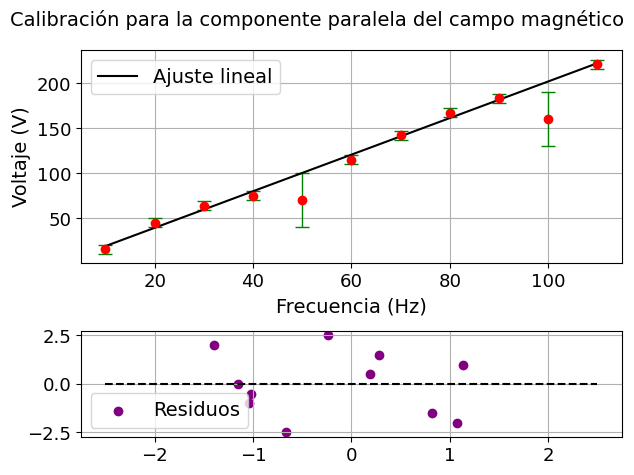

In [183]:
fig, axis = plt.subplots(2,1, gridspec_kw = {"height_ratios":[2, 1]})
ax1 = axis[0]
ax2 = axis[1]

fig.suptitle(r'Calibración para la componente paralela del campo magnético',fontsize=14)

ax1.errorbar(F, V, yerr = y_error, fmt = "ro",ecolor = "green", elinewidth = 1,capsize=5)
ax1.plot(x, y, color = "k",label='Ajuste lineal')
ax1.set_ylabel(r"Voltaje (V)",fontsize=14)
ax1.set_xlabel(r'Frecuencia (Hz)',fontsize=14)
ax1.grid()
ax1.tick_params(axis='both',labelsize=13)
ax1.legend(fontsize=14)

xresc = np.linspace(-2.5,2.5,len(y))
ax2.scatter(Residualsi(V,y),xresc,label = 'Residuos',color='purple')
ax2.plot(xresc,np.zeros_like(xresc),'--',color='k')
ax2.grid()
ax2.tick_params(axis='both',labelsize=13)
ax2.legend(fontsize=14)

fig.tight_layout()

**6.4**

In [184]:
# i) 
def chi2(params,f, V, sigma):
    m,c=params
    V_model = m*f + c
    return np.sum(((V - V_model) / sigma) ** 2)

#Del ejercicio 6.2 que trabaja con los mismos datos tomemos las siguientes condiciones iniciales:
m0 = 0.5
c0 = 10
params0 = [m0, c0]

# Resultados
resultado = minimize(chi2, params0, args=(F, V, y_error))
m_opt, c_opt = resultado.x
chi2_min = resultado.fun  
paramsopt = [m_opt, c_opt]

print('Los valores optimizados para m y c son {} y {} respectivamente'.format(round(m_opt,2),round(c_opt,2)))
print(r'El valor mínimo de $\chi$ cuadrado es {}'.format(round(chi2_min,2)))
print('Los resultados ocncuerdan con los parámetros de la tabla 6.1')

Los valores optimizados para m y c son 2.03 y -0.95 respectivamente
El valor mínimo de $\chi$ cuadrado es 9.12
Los resultados ocncuerdan con los parámetros de la tabla 6.1


In [185]:
#ii)
def ErrorContorno(chi2_min, params, f, V, sigma):

    def contorno(params):
        return chi2(params, f, V, sigma) - chi2_min
    
    m_val = np.linspace(params[0] - 1, params[0] + 1, 100)
    c_val = np.linspace(params[1] - 10, params[1] + 10, 100)
    
    val = np.zeros((len(m_val), len(c_val)))
    
    for i, m_v in enumerate(m_val):
        for j, c_v in enumerate(c_val):
            val[i, j] = contorno([m_v, c_v])
    
    return m_val, c_val, val

# Calcular contornos de confianza para el delta chi = 1, 4 y 9
m_val, c_val, chi2val1 = ErrorContorno(chi2_min, paramsopt, F, V, y_error)

print('El valor mínimo de X^2 fue de {}'.format(round(min(chi2val1[42]),2)))

El valor mínimo de X^2 fue de 8.5


Errores a partir de X^2_min + 4 para m son 0.09 y para c 3.54
Errores a partir de X^2_min + 9 para m son 0.15 y para c 7.37
Los resultados concuerdan con la tabla 6.2


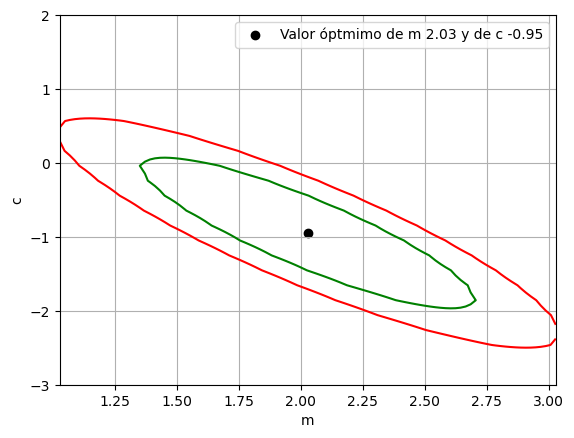

In [186]:
#iii)
m_val4, c_val4, chi2val4 = ErrorContorno(chi2_min, paramsopt, F, V, y_error)
m_val9, c_val9, chi2val9 = ErrorContorno(chi2_min, paramsopt, F, V, y_error)

# Calcular errores a partir de los contornos
def obtener_error(chi2val, m_val, c_val, delta_chi2):
    # Encuentra los valores de m y c donde X^2 = X^2_min + delta_chi2
    i = np.where(np.abs(chi2val - delta_chi2) < 0.1)
    m_error = np.abs(m_val[i[0][0]] - m_opt)
    c_error = np.abs(c_val[i[1][0]] - c_opt)
    return m_error, c_error

m_error4, c_error4 = obtener_error(chi2val4, m_val4, c_val4,  4)
m_error9, c_error9 = obtener_error(chi2val9, m_val9, c_val9,  9)

print("Errores a partir de X^2_min + 4 para m son {} y para c {}".format(round(m_error4,2),round(c_error4,2)))
print("Errores a partir de X^2_min + 9 para m son {} y para c {}".format(round(m_error9,2),round(c_error9,2)))
print('Los resultados concuerdan con la tabla 6.2')

plt.contour(m_val, c_val, chi2val4, levels=[4], colors='g')
plt.contour(m_val, c_val, chi2val9, levels=[9], colors='r')
plt.scatter(m_opt, c_opt, color='black', label='Valor óptmimo de m {} y de c {}'.format(round(m_opt,2),round(c_opt,2)))
plt.xlabel('m')
plt.ylabel('c')
plt.ylim(-3,2)
plt.legend()
plt.grid()
plt.show()


**6.5**

In [187]:
d = np.array([0.05, 0.25, 0.45, 0.65, 0.85, 1.05, 1.25, 1.45, 1.65, 1.85])
f = np.array([0.0, 0.21, 0.44, 0.67, 0.88, 1.10, 1.30, 1.50, 2.00, 2.24])
y_error = np.array([0.05, 0.05, 0.05, 0.05, 0.09, 0.10, 0.20, 0.50, 0.10, 0.07])

weight = []

for i in range(0, len(f)):
   weight.append(1/(y_error[i]**2))

sumx = 0
sumy = 0
sumxy = 0
sumxx = 0
sumw = 0

for i in range(0, len(d)):
    sumw += weight[i]
    sumx += weight[i]*d[i]
    sumy += weight[i]*f[i]
    sumxy += weight[i]*d[i]*f[i]
    sumxx += weight[i]*(d[i]**2)

delta_ = sumw*sumxx - (sumx**2)
c = (sumxx*sumy - sumx*sumxy)/delta_
m = (sumw*sumxy - sumx*sumy)/delta_
ac = np.sqrt(sumxx/delta_)
am = np.sqrt(sumw/delta_)

x = np.linspace(min(d), max(d), len(d))
y = m*x + c

print('El valor del punto de corte es {} con incertidumbre de {}'.format(np.round(c,2),np.round(ac,2)))
print('El valor de la pendiente es {} con incertidumbre de {}'.format(np.round(m,2),np.round(am,2)))
print('No, el intercepto no es cero como se espera en la teoría')

El valor del punto de corte es -0.11 con incertidumbre de 0.03
El valor de la pendiente es 1.24 con incertidumbre de 0.04
No, el intercepto no es cero como se espera en la teoría


**6.6**

In [188]:
#i)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([51, 103, 150, 199, 251, 303, 347, 398, 452, 512])
y_error = np.array([1, 1, 2, 2, 3, 3, 4, 5, 6, 7])

weight = []

for i in range(0, len(y)):
    weight.append(1/(y_error[i]**2))

sumx = 0
sumy = 0
sumxy = 0
sumxx = 0
sumw = 0

for i in range(0, len(x)):
    sumw += weight[i]
    sumx += weight[i]*x[i]
    sumy += weight[i]*y[i]
    sumxy += weight[i]*x[i]*y[i]
    sumxx += weight[i]*(x[i]**2)

delta_ = sumw*sumxx - (sumx**2)
c = (sumxx*sumy - sumx*sumxy)/delta_
m = (sumw*sumxy - sumx*sumy)/delta_
ac = np.sqrt(sumxx/delta_)
am = np.sqrt(sumw/delta_)

x_ = np.linspace(min(x), max(x), len(x))
y_ = m*x_ + c

print('El valor del punto de corte es {} con incertidumbre de {}'.format(np.round(c,2),np.round(ac,2)))
print('El valor de la pendiente es {} con incertidumbre de {}'.format(np.round(m,2),np.round(am,2)))

El valor del punto de corte es 1.73 con incertidumbre de 0.99
El valor de la pendiente es 49.9 con incertidumbre de 0.32


In [189]:
#ii) Caso en el que todos los errores de y sean 4
y_error = np.array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4])
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([51, 103, 150, 199, 251, 303, 347, 398, 452, 512])
weight = []

for i in range(0, len(y)):
    weight.append(1/(y_error[i]**2))

sumx = 0
sumy = 0
sumxy = 0
sumxx = 0
sumw = 0

for i in range(0, len(x)):
    sumw += weight[i]
    sumx += weight[i]*x[i]
    sumy += weight[i]*y[i]
    sumxy += weight[i]*x[i]*y[i]
    sumxx += weight[i]*(x[i]**2)

delta_ = sumw*sumxx - (sumx**2)
c = (sumxx*sumy - sumx*sumxy)/delta_
m = (sumw*sumxy - sumx*sumy)/delta_
ac = np.sqrt((sumxx/delta_))
am = np.sqrt(sumw/delta_)

x_ = np.linspace(min(x), max(x), len(x))
y_ = m*x_ + c

print('Para cuando los errores de y son 4')
print('El valor del punto de corte es {} con incertidumbre de {}'.format(np.round(c,2),np.round(ac,2)))
print('El valor de la pendiente es {} con incertidumbre de {}'.format(np.round(m,2),np.round(am,2)))

Para cuando los errores de y son 4
El valor del punto de corte es -1.0 con incertidumbre de 2.73
El valor de la pendiente es 50.47 con incertidumbre de 0.44


In [190]:
#Caso en el que todos los errores de y sean 8
y_error = np.array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8])
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([51, 103, 150, 199, 251, 303, 347, 398, 452, 512])
weight = []

for i in range(0, len(y)):
    weight.append(1/(y_error[i]**2))

sumx = 0
sumy = 0
sumxy = 0
sumxx = 0
sumw = 0

for i in range(0, len(x)):
    sumw += weight[i]
    sumx += weight[i]*x[i]
    sumy += weight[i]*y[i]
    sumxy += weight[i]*x[i]*y[i]
    sumxx += weight[i]*(x[i]**2)

delta_ = sumw*sumxx - (sumx**2)
c = (sumxx*sumy - sumx*sumxy)/delta_
m = (sumw*sumxy - sumx*sumy)/delta_
ac = np.sqrt((sumxx/delta_))
am = np.sqrt(sumw/delta_)

x_ = np.linspace(min(x), max(x), len(x))
y_ = m*x_ + c

print('Para cuando los errores de y son 8')
print('El valor del punto de corte es {} con incertidumbre de {}'.format(np.round(c,2),np.round(ac,2)))
print('El valor de la pendiente es {} con incertidumbre de {}'.format(np.round(m,2),np.round(am,2)))

Para cuando los errores de y son 8
El valor del punto de corte es -1.0 con incertidumbre de 5.47
El valor de la pendiente es 50.47 con incertidumbre de 0.88


Se puede observar que dependiendo de los valores de la incertidumbre relacionada al comjunto de datos aumentará o dismunuirá la de los valores calculados. Dado que el método utilizado se basa en los pesos, los últimos dos conjuntos de errores cambiaron los valores de pendiente y punto de corte respectivamente, lo que nos dice que en estos casos sí se ve afectado el análisis de la regresión lineal.

**8.2**

In [201]:
#a) y b)
# Datos para el primer ajuste (10 grados de libertad)
chimin1 = 15.9
df_1 = 10

# Valor de chi^2_nu 
chinu1 = chimin1 / df_1
print('Chi_nu para el primer ajuste = {}'.format(round(chinu1,2)))

prob1 = stats.chi2.sf(chimin1, df_1)
print('Probabilidad de obtener un valor de chi^2_min igual o mayor al valor dado = {} %'.format(round(prob1,2)*100))


Chi_nu para el primer ajuste = 1.59
Probabilidad de obtener un valor de chi^2_min igual o mayor al valor dado = 10.0 %


In [206]:
#c) y d)
# Datos para el segundo ajuste (100 grados de libertad)
chimin2 = 159
df_2 = 100
# Calcular el valor de chi^2_nu 
chinu2 = chimin2 / df_2
print('Chi_nu para el segundo ajuste = {}'.format(round(chinu2,2)))

prob2 = stats.chi2.sf(chimin2, df_2)
print('Probabilidad de obtener un valor de chi^2_min igual o mayor al valor dado = {} %'.format(round(prob2,4)*100))


Chi_nu para el segundo ajuste = 1.59
Probabilidad de obtener un valor de chi^2_min igual o mayor al valor dado = 0.02 %


La probabilidad de obtener un valor de $X^2_{min}$ mayor o igual al valor observado disminuye a medida que aumenta el número de grados de libertad. En el primer caso la probabilidad de obtener un valor igual o mayor a 15.9 es mayor mientras que en el segundo caso esta es mucho menor. Esto se debe a que la distribución chi-cuadrada se vuelve más ancha a medida que aumentan los grados de libertad.

**8.3**

In [ ]:
#i)
obs = np.array([9, 48, 142, 154, 438, 521, 405, 318, 299, 100, 57, 9])
tot = np.sum(obs)
# Número de intervalos
numinter = len(obs)
expect = tot / numinter

print('Número esperado de puntos por intervalo (E_i) = {}'.format(round(expect,2)))

#ii) 
print("E_i > 5 para todos los intervalos")

# iii) Calcular chi^2 usando la fórmula
chi_squared = np.sum((obs - expect)**2 / expect)
print('Chi cuadrado es {}'.format(round(chi_squared,2)))

# iv) 
libertad = numinter - 1
print('Grados de libertad = {}'.format(libertad))

# v) Comparar con el valor crítico de chi^2 para 11 grados de libertad y un nivel de significancia de 0.05
chi_critical = stats.chi2.ppf(0.95, libertad)
print(r'Valor crítico para un intervalo del 95 % es de {}'.format(round(chi_critical,2)))

# Ver si los datos son consistentes con la hipótesis gaussiana
if chi_squared > chi_critical:
    print("Es consistente")
else:
    print("No, no lo es")

Número esperado de puntos por intervalo (E_i) = 208.33
E_i > 5 para todos los intervalos
Chi cuadrado es 1711.66
Grados de libertad = 11
Valor crítico para un intervalo del 64 % es de 19.68
Es consistente


**8.5**

In [209]:
#i)
golesob = np.array([6, 11, 8, 8, 14, 12, 11, 12, 19])

# Número total de goles
golestot = np.sum(golesob)
# Número de intervalos
numinter = len(golesob)

expectgoles = golestot / numinter

print('Número esperado de goles por intervalo (E_i) = {}'.format(round(expectgoles,2)))

#ii) 
print("E_i > 5 para todos los intervalos")

# iii) Calcular chi^2 usando la fórmula
chi_squared = np.sum((golesob - expectgoles)**2 / expectgoles)
print('Chi cuadrado es {}'.format(round(chi_squared,2)))

# iv) 
libertad = numinter - 1
print('Grados de libertad = {}'.format(libertad))

# v) Comparar con el valor crítico de chi^2 para 8 grados de libertad y un nivel de significancia de 0.05
chi_critical = stats.chi2.ppf(0.95, libertad)
print(r'Valor crítico para un intervalo del 95 % es de {}'.format(round(chi_critical,2)))

# Ver si los datos son consistentes con la hipótesis uniforme
if chi_squared < chi_critical:
    print("Es consistente")
else:
    print("No, no lo es")

Número esperado de goles por intervalo (E_i) = 11.22
E_i > 5 para todos los intervalos
Chi cuadrado es 10.48
Grados de libertad = 8
Valor crítico para un intervalo del 95 % es de 15.51
Es consistente


**8.7**

In [217]:
#8.7
# Datos observados
obs = np.array([17, 21, 14, 13, 16, 19])
total = 100
# Número de caras del dado
numinter = len(obs)

#i) 
expect = np.full(numinter, total / numinter)
print("El número esperado para un dado justo fue de {}".format(round(expect[0],2)))

# ii)
chi_squared = np.sum((obs - expect)**2 / expect)
print('Chi cuadrado es {}'.format(round(chi_squared,2)))

# iii)
libertad = numinter - 1
print('Grados de libertad = {}'.format(libertad))

# (iv) Calcular el valor crítico de chi^2 para 5 grados de libertad y un nivel de significancia del 5%
chi_critical = stats.chi2.ppf(0.95, libertad)
print(r'Valor crítico para un intervalo del 95 % es de {}'.format(round(chi_critical,2)))

# (v) Comparar chi^2 calculado con el valor crítico
if chi_squared > chi_critical:
    print("Rechazamos la hipótesis nula. El dado no es justo.")
else:
    print("No rechazamos la hipótesis nula. No hay evidencia suficiente para decir que el dado no es justo.")


El número esperado para un dado justo fue de 16.67
Chi cuadrado es 2.72
Grados de libertad = 5
Valor crítico para un intervalo del 95 % es de 11.07
No rechazamos la hipótesis nula. No hay evidencia suficiente para decir que el dado no es justo.
